## Raw JSON Exploration 
Shows what data we currently have and the formatting

In [ ]:
import pandas as pd
import numpy as np
import json
from src import utils

In [5]:
# Load a sample game JSON file
with open("data/raw/json/0021500622.json", "r") as f:
    game = json.load(f)

In [6]:
# Explore the structure of the game data
game.keys()

dict_keys(['gameid', 'gamedate', 'events'])

In [7]:
# 448 "events" in this game
len(game['events'])

448

In [8]:
# Each event has multiple "moments" or frames; for example, the first event has 150 moments
len(game['events'][0]['moments'])

150

In [9]:
# What one moment looks like and the schema
game['events'][0]['moments'][0]

[1,
 1453165380026,
 623.59,
 15.99,
 None,
 [[-1, -1, 28.64068, 45.40327, 3.54135],
  [1610612739, 2544, 6.44329, 22.26184, 0.0],
  [1610612739, 2747, 17.45534, 4.23261, 0.0],
  [1610612739, 201567, 7.51449, 16.49044, 0.0],
  [1610612739, 202681, 27.87412, 45.4898, 0.0],
  [1610612739, 202389, 20.61859, 22.83587, 0.0],
  [1610612744, 101106, 11.4783, 29.89826, 0.0],
  [1610612744, 201939, 22.98616, 42.65101, 0.0],
  [1610612744, 202691, 17.87231, 15.54552, 0.0],
  [1610612744, 203110, 3.52194, 20.92478, 0.0],
  [1610612744, 203084, 8.26079, 24.48449, 0.0]]]

### Schema

| Index | Value           | Meaning                        | Schema Field       |
| ----- | --------------- | ------------------------------ | ------------------ |
| `0`   | `1`             | Quarter                        | `quarter`          |
| `1`   | `1453165380026` | Timestamp (ms since epoch)     | *(not documented)* |
| `2`   | `623.59`        | Game clock (seconds remaining) | `game_clock`       |
| `3`   | `15.99`         | Shot clock (seconds remaining) | `shot_clock`       |
| `4`   | `None`          | Event ID / unused              | *(ignore)*         |
| `5`   | `[...]`         | Ball + player positions        | see below          |


#### Ball Position (always first)
| Field     | Value                   |
| --------- | ----------------------- |
| team_id   | `-1`                    |
| player_id | `-1`                    |
| x         | `28.64`                 |
| y         | `45.40`                 |
| z         | `3.54` (height of ball) |

#### Player Postions (next 10 entries)
| Field    | Value        |
| -------- | ------------ |
| teamid   | `1610612739` |
| playerid | `2544`       |
| x        | `6.44`       |
| y        | `22.26`      |
| z        | `0.0`        |



## Cleaned JSON Exploration

In [16]:
# Load the JSON data
with open("data/processed/0021500622_processed.json", "r") as f:
    game = json.load(f)

# Assign possession for events w/o possession info according to closest player to ball
for event in game:
    utils.assign_event_possession(event)

In [17]:
# One example play
play1 = game[0]
play1.keys()

dict_keys(['gameid', 'event_id', 'possession_team_id', 'quarter', 'frames'])

In [25]:
# One example frame
frame1 = play1["frames"][0]
frame1.keys()

dict_keys(['frame_id', 'game_clock', 'shot_clock', 'ball', 'players'])

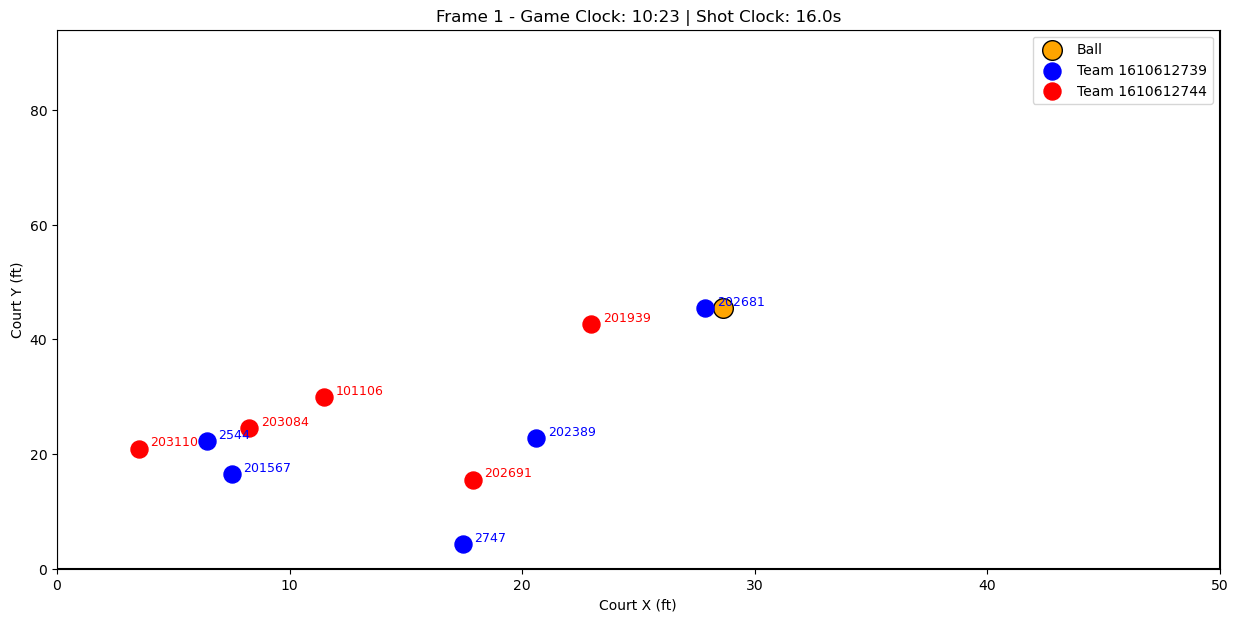

In [26]:
utils.plot_frame(frame1, team_colors={1610612739: 'blue', 1610612744: 'red'})